In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.layers import Dense, add, Input
from keras.utils import plot_model
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from itertools import product
from numpy.linalg import norm

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
from pandas import DataFrame

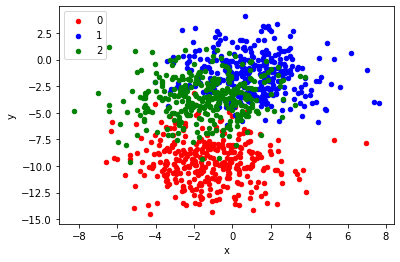

In [ ]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [ ]:
# one hot encode output variable
y1 = keras.utils.to_categorical(y)

In [ ]:
# split into train and test
#n_train = 700
trainX = X 
trainy = y1
print(trainX.shape)

(1000, 2)


# **MLP-5**

In [ ]:
# making the model
model = keras.Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(trainX, trainy, epochs=500, verbose=1)

Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 1.1281 - accuracy: 0.3010
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 1.0398 - accuracy: 0.5763
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 0.9626 - accuracy: 0.6885
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 0.8322 - accuracy: 0.7265
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.7547
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6018 - accuracy: 0.7624
Epoch 7/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.7660
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.8120
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy: 0.8169
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.8153
Epoch 11/

32/32 - 0s - loss: 0.3489 - accuracy: 0.8420
Train acc: 0.842
Train loss: 0.349


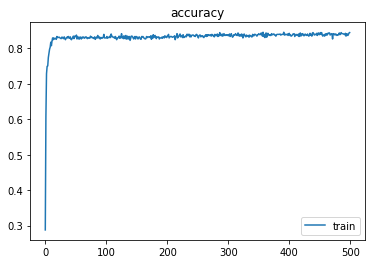

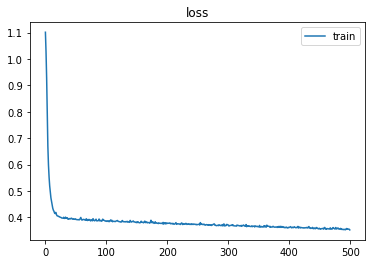

In [ ]:
# evaluate the model
train_loss, train_acc = model.evaluate(trainX, trainy, verbose=2)
#test_loss, test_acc = model.evaluate(testX, testy, verbose=2)
print('Train acc: %.3f' % (train_acc))
print('Train loss: %.3f' % (train_loss))
# learning curves of model accuracy
plt.plot(history.history['accuracy'], label='train')
#plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title('accuracy')
plt.show()
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('loss')
plt.show()









# **MLP-5 with skip connection**

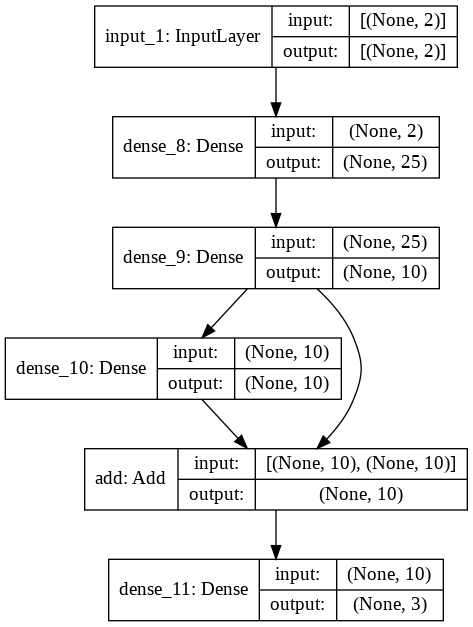

In [ ]:
model_in = Input(shape=(2))
x1 = Dense(25, activation="relu")(model_in)
x2 = Dense(10, activation="relu")(x1)
merge_input= x2
x3 = Dense(10, activation="relu")(x2)
merge=add([x3, merge_input])
out=Dense(3, activation="softmax")(merge)

model = Model(inputs=model_in, outputs=out)

plot_model(model, show_shapes=True, to_file='model1.png')




In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainy, epochs=500, verbose=1)

Epoch 1/500
32/32 [==============================] - 0s 2ms/step - loss: 1.1304 - accuracy: 0.3534
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 0.8944 - accuracy: 0.4898
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 0.7860 - accuracy: 0.6081
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.6873
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6256 - accuracy: 0.7080
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.6971
Epoch 7/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5780 - accuracy: 0.7430
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5538 - accuracy: 0.7629
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.8188
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.7927
Epoch 11/

32/32 - 0s - loss: 0.3622 - accuracy: 0.8420
Train acc: 0.842
Train loss: 0.362


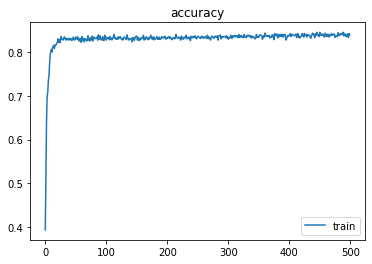

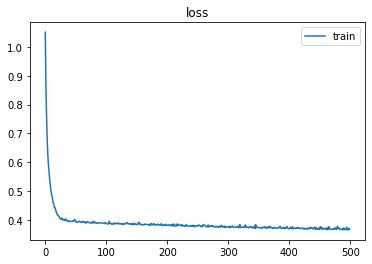

In [ ]:
# evaluate the model
train_loss, train_acc = model.evaluate(trainX, trainy, verbose=2)
#test_loss, test_acc = model.evaluate(testX, testy, verbose=2)
print('Train acc: %.3f' % (train_acc))
print('Train loss: %.3f' % (train_loss))
# learning curves of model accuracy
plt.plot(history.history['accuracy'], label='train')
#plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title('accuracy')
plt.show()
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('loss')
plt.show()

**The charecteristics of the training process have been graphed out by considering the loss and the accuracy of the model while training**

We can see that the by adding the skip connection to the MLP-5 we havn't altered the training accuracy or the loss of the model. It is very similar to the model with no skip connection.

# **MLP-7 with skip connection**

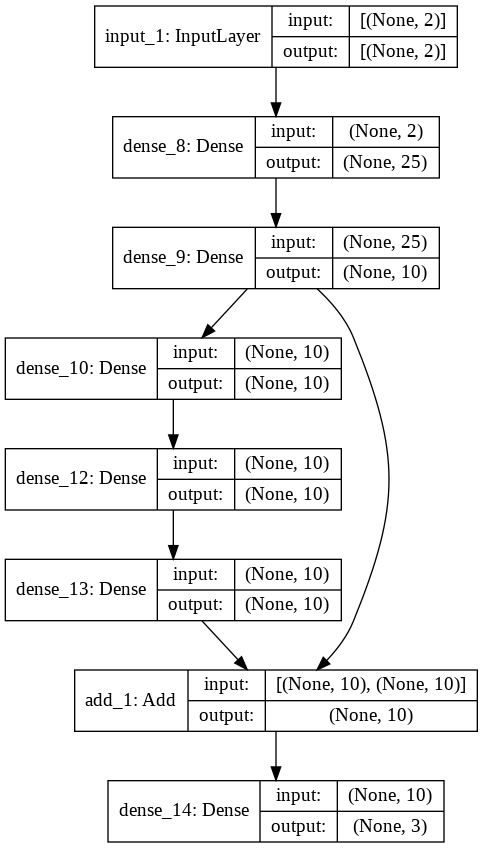

In [ ]:
x4 = Dense(10, activation="relu")(x3)
x5 = Dense(10, activation="relu")(x4)
merge=add([x5, merge_input])
out=Dense(3, activation="softmax")(merge)

model = Model(inputs=model_in, outputs=out)

plot_model(model, show_shapes=True, to_file='model1.png')















































In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainy, epochs=500, verbose=1)

Epoch 1/500
32/32 [==============================] - 1s 1ms/step - loss: 3.6055 - accuracy: 0.3280
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 2.0245 - accuracy: 0.2559
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 1.0942 - accuracy: 0.3440
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.7213
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.7428
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5022 - accuracy: 0.7859
Epoch 7/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.7783
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.8028
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.8114
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8178
Epoch 11/

32/32 - 0s - loss: 0.3388 - accuracy: 0.8450
Train acc: 0.845
Train loss: 0.339


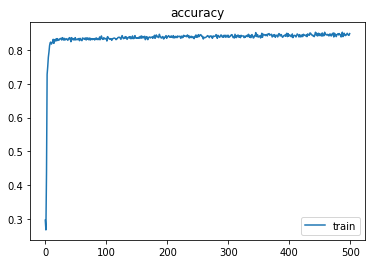

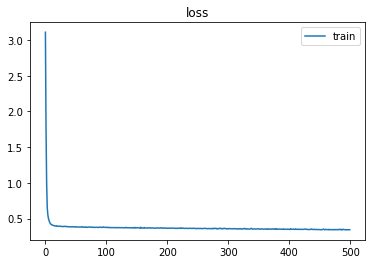

In [ ]:
# evaluate the model
train_loss, train_acc = model.evaluate(trainX, trainy, verbose=2)
#test_loss, test_acc = model.evaluate(testX, testy, verbose=2)
print('Train acc: %.3f' % (train_acc))
print('Train loss: %.3f' % (train_loss))
# learning curves of model accuracy
plt.plot(history.history['accuracy'], label='train')
#plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title('accuracy')
plt.show()
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('loss')
plt.show()

# **MLP-9 with skip connection**

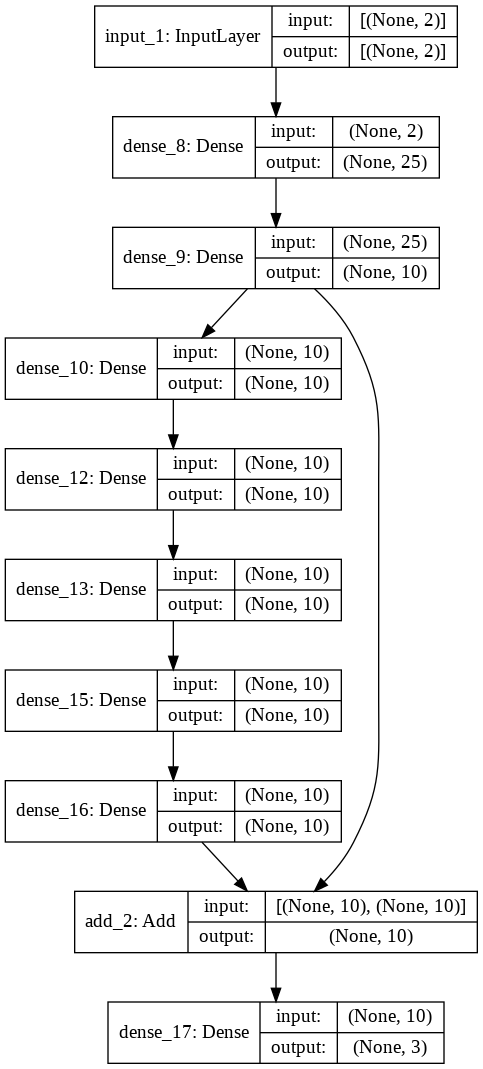

In [ ]:
x6 = Dense(10, activation="relu")(x5)
x7 = Dense(10, activation="relu")(x6)
merge=add([x7, merge_input])
out=Dense(3, activation="softmax")(merge)

model = Model(inputs=model_in, outputs=out)

plot_model(model, show_shapes=True, to_file='model1.png')






































In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainy, epochs=500, verbose=1)

Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 2.1786 - accuracy: 0.1623
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.8526 - accuracy: 0.6301
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7156
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5345 - accuracy: 0.7668
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.8080
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8278
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8360
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8325
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8348
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8169
Epoch 11/

32/32 - 0s - loss: 0.3058 - accuracy: 0.8640
Train acc: 0.864
Train loss: 0.306


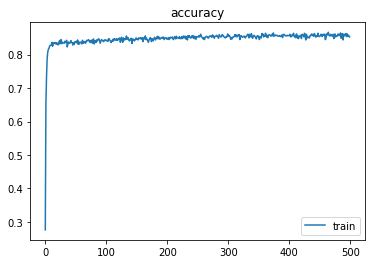

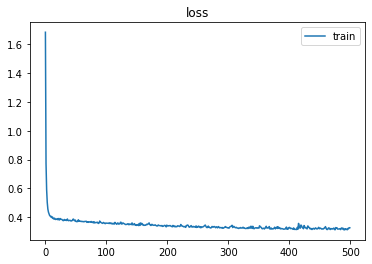

In [ ]:
# evaluate the model
train_loss, train_acc = model.evaluate(trainX, trainy, verbose=2)
#test_loss, test_acc = model.evaluate(testX, testy, verbose=2)
print('Train acc: %.3f' % (train_acc))
print('Train loss: %.3f' % (train_loss))
# learning curves of model accuracy
plt.plot(history.history['accuracy'], label='train')
#plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title('accuracy')
plt.show()
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('loss')
plt.show()
























**We can see that by making deeper networks with a skip connection to the output layer we are able to achieve a lower training loss at the end of training (keeping the epochs constant in all models). Thereby making our model more accurate in the training phase.**